# Statistical Mechanics Midterm Asignment
## Felix Semler
## S3898547

Python and Package versions:

Python 3.9.12

numpy 1.21.5

scipy 1.10.0

matplotlib 3.7.1

Notation:
I use $\mathcal{Z}$ for the partition function

### A:

Using the Quantum Harmonic oscillator formulation we know that the energy levels are:
\begin{equation}
 E_n = (n+\frac{1}{2}) \hbar\omega
\end{equation}

As we are modelling N 3-dimensional coupled oscillators, or equivalently 3N 1-dimensional independent oscillators with differing oscillation frequencies we require that omega be the average oscillation frequency denoted as $\omega_E$

Furthermore, we can get rid of the $E_0$ energy as it is constant and does not contribute to the thermodynamic properties

We define the partition function for a discrete ensemble as :
\begin{equation}
 \mathcal{Z} \equiv \sum_{n} e^{-E_n\beta}
\end{equation}

So we can write:
\begin{equation}
 \mathcal{Z} = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta}
\end{equation}

for individual phonons.

As our phonons are independent (or assumed to be so) a system with 3N vibrational modes will be the product of each phonons partition function

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{3N} \mathcal{Z}_k
\end{equation}

We can rewrite our individual phonon partition function using:
\begin{equation}
 \sum_{x=0}^{\infty} e^{cx} = \frac{1}{1-e^c}
\end{equation}

Which gives us:
\begin{equation}
 \mathcal{Z}_k = \sum_{n=0}^{\infty} e^{-n\hbar\omega_E\beta} =  \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}

So that the systems partition function is:

\begin{equation}
 \mathcal{Z} = \prod_{k=1}^{\infty} \frac{ 1}{1-e^{-\hbar\omega_E\beta}}
\end{equation}


### B:

The average occupational number is given as:
\begin{equation}
\braket{n_i}=-\frac{1}{\beta}\frac{\partial}{\partial (\hbar \omega_E)} \log \mathcal{Z}
\end{equation}

Now to work this out:
\begin{equation}
\log\mathcal{Z} = - \sum_{i=1}^{3N} \log(1-e^{-\hbar\beta\omega_E})
\end{equation}

\begin{equation}
\frac{\partial}{\partial \hbar\omega_E}  \log(1-e^{-\hbar\beta\omega_E}) = \frac{-\beta e^{-\beta\hbar\omega_E}}{1-e^{-\hbar\beta\omega_E}}
\end{equation}

So we get:

\begin{equation}
\braket{n_i}=-\frac{\beta}{\beta}\frac{e^{-\beta\hbar\omega_E}}{e^{-\hbar\beta\omega_E}-1}
\end{equation}

Which becomes:

\begin{equation}
\braket{n_i}=\frac{1}{e^{\hbar\beta\omega_E}-1}
\end{equation}

This expression tells us that the population is 

### C:

Internal Energy is given as:
\begin{equation}
U = -\frac{\partial}{\partial \beta}\log \mathcal{Z}
\end{equation}

For the entire system
\begin{equation}
\frac{\partial}{\partial \beta}\log \mathcal{Z} = -\sum_{i=1}^{3N} \frac{\hbar \omega_E}{e^{\beta\hbar\omega_i}-1}
\end{equation}

So we have:
\begin{equation}
U    = \sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\beta\hbar\omega_i}-1}
\end{equation}


## D: 
To define the heat capacity we need to find the internal energy stored per unit Volume per unit temperature T.

\begin{equation}
    C_V=\frac{dU}{dT} = \frac{d}{dT} \sum_{i=1}^{3N} \frac{\hbar \omega_i}{e^{\frac{\hbar\omega_i}{kT}}-1}
\end{equation}

\begin{equation}
    C_V= \sum_{i=1}^{3N} (\hbar\omega_i)^2 \frac{e^{\frac{\hbar \omega_i}{kT}}}{kT^2\left(e^{\frac{\hbar \omega_i}{kT}}-1\right)^2}
\end{equation}

Since we can work with $\omega_E$ we can simply remove the summation and multiply by $3N$, we also resubstitute $\beta$

\begin{equation}
    C_V= 3N (\hbar\omega_E)^2 \beta^2 k\frac{e^{\hbar \beta \omega_E}}{\left(e^{\hbar\beta \omega_E}-1\right)^2}
\end{equation}

## E:

In [3]:
import numpy as np
import scipy
import scipy.constants as cst

In [4]:
#Temperature in K - Specific Heat (cal/mol/K)
data = np.loadtxt('./diamond.dat', delimiter=' ', skiprows=2)

Conversion const. 4.184 J/cal

Here the equation from slide 28 lecture 11 will be utilized (with k moved to the other side)

note that our heat capacity is specific, so that it is equivalent to $C_V/mol=C_V/N_A=C_V/N_A$ since $mol = N_A$ particles and $N_A=N$ for these measurements

In [5]:
x_dat = data[:,0] 
y_dat = data[:,1]*4.184/(3*cst.k*cst.Avogadro)#/ () # cal-> J and move constants over



def heat_capactity(T, T_E):
    return (T_E/T)**2 * ((np.exp(-T_E/T) ) / ((np.exp(-T_E/T))-1)**2 )


T_E, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat,p0=[298])
T_E=T_E[0]

In [6]:
T_E_diamond = T_E 
T_E

1363.7487079528573

## F:

In [7]:
def integral(t):
    return t**3/(np.exp(t)-1)

def D(x):
    # Solver uses array so element wise integrate
    return 3/(x**3)*[scipy.integrate.quad(integral,0,i)[0] for i in x]

def Debye_temp(T,T_D):
    # Equation from Book pae 285 - moved exponent aroun a little - also note the lack of a 3 
    return (4*D(T_D/T)- (3*T_D/T*np.exp(-T_D/T))/(1-np.exp(-T_D/T)))


T_D, pcov = scipy.optimize.curve_fit(Debye_temp, x_dat, y_dat,p0=[298])
T_D=T_D[0]

/tmp/ipykernel_2055366/3055823458.py:2: RuntimeWarning: overflow encountered in exp
  return t**3/(np.exp(t)-1)


In [8]:
T_D_diamond = T_D
T_D

1853.7264646538981

## G:

Diamond: Einstein: 1363.7487079528573, Debye: 1853.7264646538981


/tmp/ipykernel_2055366/3055823458.py:2: RuntimeWarning: overflow encountered in exp
  return t**3/(np.exp(t)-1)


Text(0.5, 1.0, 'Normalized Heat capacity for Diamond')

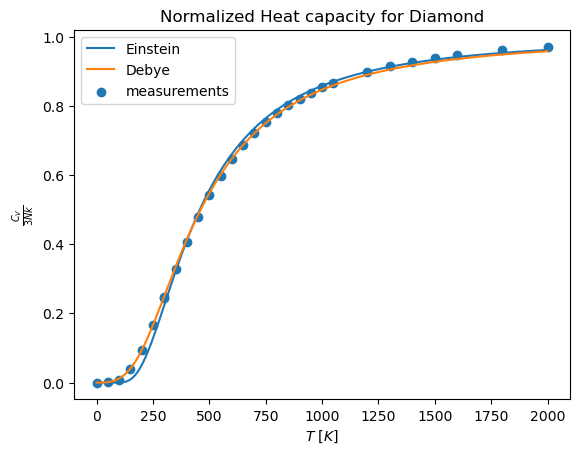

In [9]:
import matplotlib.pyplot as plt
print('Diamond: Einstein: {}, Debye: {}'.format(T_E,T_D))
x = np.linspace(0.1,x_dat.max(),1000)
plt.plot(x,heat_capactity(x, T_E=T_E), label='Einstein')
plt.plot(x,Debye_temp(x, T_D=T_D), label='Debye')
plt.scatter(x_dat,y_dat,label='measurements')
plt.xlabel(r'$T\ [K]$')
plt.ylabel(r'$\frac{C_V}{3Nk}$') 
plt.legend()
plt.title('Normalized Heat capacity for Diamond')

Here one can see that the Einstein and Debye fits are quite close to each other, the Debye model starts ascending a little earlier than the Einstein model, generally Debye predicts a little higher than Einstein. In the low to mid temperature limit (relative to 0-2000K) Debye gives the better fit, while in the higher limit einstein performs better.

## H

Graphite: Einstein: 1167.1410653385772, Debye: 1599.9142304774807

/tmp/ipykernel_2055366/3055823458.py:2: RuntimeWarning: overflow encountered in exp
  return t**3/(np.exp(t)-1)


Text(0.5, 1.0, 'Normalized heat capacity for graphite')

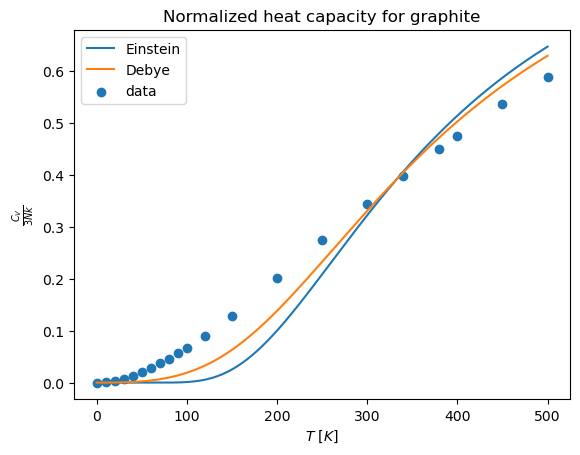

In [10]:
data = np.loadtxt('./graphite.dat', delimiter=' ', skiprows=2)
x_dat = data[:,0] 
y_dat = data[:,1]/(3*cst.k*cst.Avogadro)#/ () # already in Joules
T_E, pcov = scipy.optimize.curve_fit(heat_capactity, x_dat, y_dat)
T_E=T_E[0]
T_E_graph = T_E
T_D, pcov = scipy.optimize.curve_fit(Debye_temp, x_dat, y_dat,p0=[298])
T_D=T_D[0]
T_D_graph = T_D
print('Graphite: Einstein: {}, Debye: {}'.format(T_E,T_D))
x = np.linspace(0.1,x_dat.max(),1000)
plt.plot(x,heat_capactity(x, T_E=T_E), label='Einstein')
plt.plot(x,Debye_temp(x, T_D=T_D), label='Debye')
plt.scatter(x_dat,y_dat,label='data')
plt.xlabel(r'$T\ [K]$')
# Unitless
plt.ylabel(r'$\frac{C_V}{3Nk}$') 
plt.legend()
plt.title('Normalized heat capacity for graphite')

## I:
Diamond is a strongly interconnected molecule with symmetries along several spacial axes, i.e. symmetric bonding with each carbon bonded to 4 other carbons in a cubic structure, graphite on the other hand bonds along a plane only, making connections with 3 carbon in a hexagon configuration where individual planes are kept together through the in comparison very small van der Walls force. Since these models are developed for 3 dimensionally propagating phonons, one inherently assumes interconnection interconnection in 3D as this does not descirbe graphite particularly well one achieves poorer fitting results for the planar bonding substance.

## J:

Entropy at room temperature NTP: 293.15 K 

Entropy can be found using:
\begin{equation}
    S = \int^{T}_0 \frac{C_V}{T} dT
\end{equation}
where the debye specific heat capacity in the NTP limit ($T<<T_D$) is found by:
\begin{equation}
\frac{C_V}{Nk} = \frac{12\pi^4}{5}\left(\frac{T}{T_D}\right)^3 + \mathcal{O}(e^{-T_D/T})
\end{equation}
So we have

\begin{equation}
    S = Nk\frac{12\pi^4}{5 T_D^3}\int^{T}_0  T^2 dT
\end{equation}
which becomes:
\begin{equation}
    S = Nk\frac{12\pi^4}{5 T_D^3}  \frac{T^3}{3}
\end{equation}

In [11]:
def entropy_debye(T_D, N=cst.Avogadro, T=293.15):
    return N*cst.k*12*np.pi**4*T**3/(5*T_D**3*3)
print('Diamond entropy:  {:.10} [J/K]'.format(entropy_debye(T_D = T_D_diamond)))
print('Graphite entropy: {:.10} [J/K]'.format(entropy_debye(T_D = T_D_graph)))

Diamond entropy:  2.562455947 [J/K]
Graphite entropy: 3.985687592 [J/K]
